In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

heart = pd.read_csv("heart_disease_df_1.csv")
heart.sample(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
875,60,1,0.00,130,206.00,0,0.00,132,1,NaN,1,2,3,0
867,41,1,1.00,110,235.00,0,1.00,153,0,NaN,2,0,2,1
26,44,1,2.00,130,233.00,0,1.00,179,1,NaN,2,0,2,1
206,59,1,2.00,126,218.00,1,1.00,134,0,NaN,1,1,1,0
779,34,0,1.00,118,210.00,0,1.00,192,0,NaN,2,0,2,1
675,58,1,0.00,100,234.00,0,1.00,156,0,NaN,2,1,3,0
835,49,1,2.00,118,149.00,0,0.00,126,0,NaN,2,3,2,0
527,62,0,0.00,124,209.00,0,1.00,163,0,NaN,2,0,2,1
481,63,0,0.00,150,407.00,0,0.00,154,0,NaN,1,3,3,0
14,52,1,0.00,128,204.00,1,1.00,156,1,NaN,1,0,0,0


In [7]:
# information on the value counts and datatypes for the dataset
heart.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1076 non-null   int64  
 1   sex       1076 non-null   int64  
 2   cp        1023 non-null   float64
 3   trestbps  1076 non-null   int64  
 4   chol      1021 non-null   float64
 5   fbs       1076 non-null   int64  
 6   restecg   1028 non-null   float64
 7   thalach   1076 non-null   int64  
 8   exang     1076 non-null   int64  
 9   oldpeak   0 non-null      float64
 10  slope     1076 non-null   int64  
 11  ca        1076 non-null   int64  
 12  thal      1076 non-null   int64  
 13  target    1076 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 117.8 KB


In [8]:
# detailed description of the data
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1076.00,1076.00,1023.00,1076.00,1021.00,1076.00,1028.00,1076.00,1076.00,0.00,1076.00,1076.00,1076.00,1076.00
mean,54.55,0.69,0.95,131.75,245.54,0.15,0.53,149.15,0.33,NaN,1.39,0.76,2.33,0.51
std,9.00,0.46,1.02,17.47,50.35,0.36,0.53,22.81,0.47,NaN,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,NaN,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,133.00,0.00,NaN,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,NaN,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,NaN,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,NaN,2.00,4.00,3.00,1.00


In [9]:
heart_clean = heart.drop(columns='oldpeak').ffill()
heart_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,52,1,0.00,125,212.00,0,1.00,168,0,2,2,3,0
1,53,1,0.00,140,203.00,1,0.00,155,1,0,0,3,0
2,70,1,0.00,145,174.00,0,1.00,125,1,0,0,3,0
3,61,1,0.00,148,203.00,0,1.00,161,0,2,1,3,0
4,62,0,0.00,138,294.00,1,1.00,106,0,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,51,0,2.00,130,256.00,0,0.00,149,0,2,0,2,1
1072,54,0,2.00,160,201.00,0,1.00,163,0,2,1,2,1
1073,59,1,2.00,126,218.00,1,1.00,134,0,1,1,1,0
1074,58,0,1.00,136,319.00,1,0.00,152,0,2,2,2,0


In [10]:
# making dure that there are no missing values
heart_clean.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
slope       0
ca          0
thal        0
target      0
dtype: int64

### EXPLORATORY DATA ANALYSIS

In [21]:
# spliting the data frame between men and women 
men = heart_clean.set_index('sex').loc[1]
women = heart_clean.set_index('sex').loc[0]
men
#women = heart_clean.set_index('sex').loc[0]

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
sex,,,,,,,,,,,,
1,52,0.00,125,212.00,0,1.00,168,0,2,2,3,0
1,53,0.00,140,203.00,1,0.00,155,1,0,0,3,0
1,70,0.00,145,174.00,0,1.00,125,1,0,0,3,0
1,61,0.00,148,203.00,0,1.00,161,0,2,1,3,0
1,58,0.00,114,318.00,0,2.00,140,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1,52,0.00,125,212.00,0,1.00,168,0,2,2,3,0
1,62,1.00,128,208.00,1,0.00,140,0,2,0,2,1
1,48,1.00,110,229.00,0,1.00,168,0,0,0,3,0


In [13]:
# grouping the dataset by age and sex and getting the mean of the coressponding features
heart_stats = heart_clean.groupby(['sex', 'age'])[heart_clean.drop(['sex', 'age', 'target'], axis=1).columns].mean()
heart_stats

cp  trestbps   chol  fbs  restecg  thalach  exang  slope   ca  thal
sex age                                                                      
0   34  1.00    118.00 210.00 0.00     1.00   192.00   0.00   2.00 0.00  2.00
    35  0.00    138.00 183.00 0.00     1.00   182.00   0.00   2.00 0.00  2.00
    37  2.00    120.00 215.00 0.00     1.00   170.00   0.00   2.00 0.00  2.00
    39  2.00    119.14 211.00 0.00     1.00   163.57   0.00   1.43 0.00  2.00
    41  1.31    118.85 247.38 0.00     0.54   168.31   0.23   2.00 0.23  2.00
...      ...       ...    ...  ...      ...      ...    ...    ...  ...   ...
1   67  0.30    130.57 249.74 0.13     0.26   122.83   0.52   1.00 1.48  2.52
    68  1.40    144.40 250.90 0.60     0.70   147.70   0.30   1.40 1.00  3.00
    69  2.38    147.50 246.50 0.38     0.00   140.38   0.00   1.00 2.25  2.62
    70  0.64    146.29 251.86 0.00     0.50   121.50   0.50   0.93 1.07  2.50
    77  0.00    125.00 304.00 0.00     0.00   162.00   1.00   2.00 3.00  2.00

[73 rows x 10 columns]

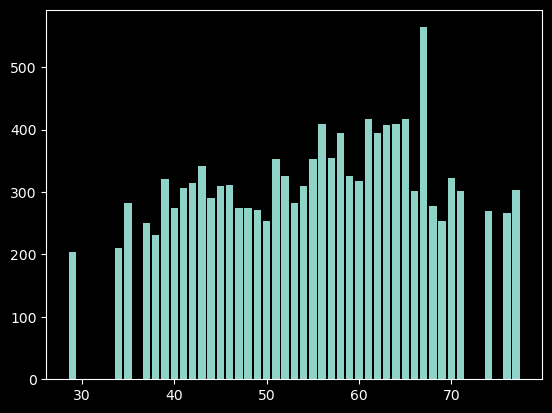

In [29]:
plt.bar(heart_clean['age'].values, heart_clean['chol'].values, )
plt.show()

### MODEL TRAINING

In [70]:
# using lazy regressor to chose the appropriate model
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
x = heart_clean.drop('target', axis=1)
y = heart_clean['target']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=34, train_size=.7)

lazy = LazyRegressor(verbose=1, ignore_warnings=True, random_state=43)
models, predictions = lazy.fit(xtrain, xtest, ytrain, ytest)
predictions

  0%|          | 0/42 [00:00<?, ?it/s]

 10%|▉         | 4/42 [00:00<00:02, 18.80it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5541221856970597, 'Adjusted R-Squared': 0.5368623993369459, 'RMSE': 0.3335102010350019, 'Time taken': 0.11446833610534668}
{'Model': 'BaggingRegressor', 'R-Squared': 0.8886763236763238, 'Adjusted R-Squared': 0.8843670200766975, 'RMSE': 0.16664602555361868, 'Time taken': 0.07268977165222168}
{'Model': 'BayesianRidge', 'R-Squared': 0.5253025309301995, 'Adjusted R-Squared': 0.5069271450307233, 'RMSE': 0.34411978944488014, 'Time taken': 0.018473386764526367}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.875893337431799, 'Adjusted R-Squared': 0.8710892085581912, 'RMSE': 0.1759538357694467, 'Time taken': 0.024396657943725586}
{'Model': 'DummyRegressor', 'R-Squared': -0.0010154276026732578, 'Adjusted R-Squared': -0.03976441189697044, 'RMSE': 0.49971406789237294, 'Time taken': 0.020171642303466797}
{'Model': 'ElasticNet', 'R-Squared': -0.0010154276026732578, 'Adjusted R-Squared': -0.03976441189697044, 'RMSE': 0.49971406789237294, 'Time taken': 

 17%|█▋        | 7/42 [00:00<00:02, 16.98it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.52697439135377, 'Adjusted R-Squared': 0.5086637226319803, 'RMSE': 0.3435132687125537, 'Time taken': 0.15036749839782715}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.875893337431799, 'Adjusted R-Squared': 0.8710892085581912, 'RMSE': 0.1759538357694467, 'Time taken': 0.015691280364990234}


 26%|██▌       | 11/42 [00:00<00:02, 13.86it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9564199454391762, 'Adjusted R-Squared': 0.9547329755852088, 'RMSE': 0.10426656716255588, 'Time taken': 0.21831059455871582}
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.825030853083278, 'Adjusted R-Squared': 0.8182578538477919, 'RMSE': 0.20892091901859736, 'Time taken': 0.10586881637573242}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7652633719715133, 'Adjusted R-Squared': 0.7561767928220234, 'RMSE': 0.241986769183654, 'Time taken': 0.27121615409851074}


 38%|███▊      | 16/42 [00:01<00:02,  9.21it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.911713698433222, 'Adjusted R-Squared': 0.9082961641790241, 'RMSE': 0.14840476734036084, 'Time taken': 0.40262842178344727}
{'Model': 'HuberRegressor', 'R-Squared': 0.5299592065337301, 'Adjusted R-Squared': 0.5117640790447131, 'RMSE': 0.3424277606720419, 'Time taken': 0.028341293334960938}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6098086528855761, 'Adjusted R-Squared': 0.5947044717069532, 'RMSE': 0.3119895211386267, 'Time taken': 0.023847341537475586}
{'Model': 'KernelRidge', 'R-Squared': -0.5322609697760821, 'Adjusted R-Squared': -0.5915742976383822, 'RMSE': 0.6182548899659044, 'Time taken': 0.06053733825683594}
{'Model': 'Lars', 'R-Squared': 0.5269231742743246, 'Adjusted R-Squared': 0.5086105229559112, 'RMSE': 0.34353186524288476, 'Time taken': 0.047539472579956055}


 43%|████▎     | 18/42 [00:01<00:02, 10.48it/s]

{'Model': 'LarsCV', 'R-Squared': 0.5269231742743246, 'Adjusted R-Squared': 0.5086105229559112, 'RMSE': 0.34353186524288476, 'Time taken': 0.07158923149108887}
{'Model': 'Lasso', 'R-Squared': -0.0010154276026732578, 'Adjusted R-Squared': -0.03976441189697044, 'RMSE': 0.49971406789237294, 'Time taken': 0.022273778915405273}


 57%|█████▋    | 24/42 [00:01<00:01, 15.34it/s]

{'Model': 'LassoCV', 'R-Squared': 0.5269832284836969, 'Adjusted R-Squared': 0.5086729018443561, 'RMSE': 0.3435100599163384, 'Time taken': 0.18350744247436523}
{'Model': 'LassoLars', 'R-Squared': -0.0010154276026732578, 'Adjusted R-Squared': -0.03976441189697044, 'RMSE': 0.49971406789237294, 'Time taken': 0.021703004837036133}
{'Model': 'LassoLarsCV', 'R-Squared': 0.5269231742743246, 'Adjusted R-Squared': 0.5086105229559112, 'RMSE': 0.34353186524288476, 'Time taken': 0.04285550117492676}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5269231742743246, 'Adjusted R-Squared': 0.5086105229559112, 'RMSE': 0.34353186524288476, 'Time taken': 0.01893472671508789}
{'Model': 'LinearRegression', 'R-Squared': 0.5269231742743241, 'Adjusted R-Squared': 0.5086105229559108, 'RMSE': 0.3435318652428849, 'Time taken': 0.014929533004760742}
{'Model': 'LinearSVR', 'R-Squared': 0.5044105458128634, 'Adjusted R-Squared': 0.4852264379088451, 'RMSE': 0.3516108099148271, 'Time taken': 0.03348207473754883}


 64%|██████▍   | 27/42 [00:03<00:03,  4.50it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.8550026416029827, 'Adjusted R-Squared': 0.8493898406327756, 'RMSE': 0.19018717847519612, 'Time taken': 1.4229366779327393}
{'Model': 'NuSVR', 'R-Squared': 0.8259782681662146, 'Adjusted R-Squared': 0.8192419430629713, 'RMSE': 0.20835452344727873, 'Time taken': 0.1908552646636963}


 76%|███████▌  | 32/42 [00:03<00:01,  7.21it/s]

{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.14458057803189028, 'Adjusted R-Squared': 0.11146756814925374, 'RMSE': 0.4619455030090773, 'Time taken': 0.017775297164916992}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.4341956177567696, 'Adjusted R-Squared': 0.4122935126376768, 'RMSE': 0.37569407314766556, 'Time taken': 0.03351235389709473}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.4130581861639375, 'Adjusted R-Squared': -0.4677572127251224, 'RMSE': 0.5937193633439274, 'Time taken': 0.016923904418945312}
{'Model': 'PoissonRegressor', 'R-Squared': 0.3712318120217192, 'Adjusted R-Squared': 0.3468923982935276, 'RMSE': 0.3960467655224734, 'Time taken': 0.016965627670288086}
{'Model': 'QuantileRegressor', 'R-Squared': -0.9112426035502952, 'Adjusted R-Squared': -0.9852261882038551, 'RMSE': 0.6904927123138331, 'Time taken': 0.06597614288330078}
{'Model': 'RANSACRegressor', 'R-Squared': -0.8615999385230155, 'Adjusted R-Squared': -0.9336618716271325, 'RMSE': 0.681

 90%|█████████ | 38/42 [00:04<00:00,  8.13it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9031732229309153, 'Adjusted R-Squared': 0.8994250896250152, 'RMSE': 0.1554171456567347, 'Time taken': 0.3401916027069092}
{'Model': 'Ridge', 'R-Squared': 0.5268697076212943, 'Adjusted R-Squared': 0.5085549866259895, 'RMSE': 0.34355127750227415, 'Time taken': 0.015210866928100586}
{'Model': 'RidgeCV', 'R-Squared': 0.5263690220409325, 'Adjusted R-Squared': 0.5080349196683234, 'RMSE': 0.3437330093532056, 'Time taken': 0.03542780876159668}
{'Model': 'SGDRegressor', 'R-Squared': 0.5243288060887088, 'Adjusted R-Squared': 0.5059157276147233, 'RMSE': 0.3444725470987439, 'Time taken': 0.04358077049255371}
{'Model': 'SVR', 'R-Squared': 0.8338772101215493, 'Adjusted R-Squared': 0.8274466505133511, 'RMSE': 0.2035709476911274, 'Time taken': 0.0951998233795166}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5269231742743241, 'Adjusted R-Squared': 0.5086105229559108, 'RMSE': 0.3435318652428849, 'Time taken': 0.01925969123840332}
{'Model': 'Twe

100%|██████████| 42/42 [00:04<00:00,  8.70it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9451731734949089, 'Adjusted R-Squared': 0.9430508447269699, 'RMSE': 0.11694933179337771, 'Time taken': 0.1850419044494629}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 12
[LightGBM] [Info] Start training from score 0.507304
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.95,0.96,0.10,0.22
XGBRegressor,0.94,0.95,0.12,0.19
HistGradientBoostingRegressor,0.91,0.91,0.15,0.40
RandomForestRegressor,0.90,0.90,0.16,0.34
LGBMRegressor,0.90,0.90,0.16,0.11
BaggingRegressor,0.88,0.89,0.17,0.07
DecisionTreeRegressor,0.87,0.88,0.18,0.02
ExtraTreeRegressor,0.87,0.88,0.18,0.02
MLPRegressor,0.85,0.86,0.19,1.42


In [ ]:
from xgboost import XGBRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor

extra = ExtraTreeRegressor()

xgb = XGBRegressor()

rf = RandomForestRegressor()